# Unlocking Smart Growth: The Effects of Proposed Transit-Oriented

Development Laws on the Puget Sound Region

Exploring the Impact of the Community and Transit-Oriented Housing Development Bills HB 2160 and SB 6024 Across Washington State’s Central Puget Sound Region

Tiernan Martin (Futurewise)  
Alex Brennan (Futurewise)  
February 11, 2024

During the 2024 legislative session in Washington State, members of the House of Representatives introduced a bill aimed at promoting community and transit-oriented housing development. This, House Bill 2160, proposed mandating cities to allow developments of a specific scale within certain distances from high-capacity transit stops. This study evaluates the extent to which the proposed increases in development capacity under this bill exceed current allowances. The findings indicate a substantial increase in development potential for the majority of areas within walking distance of transit stops. Specifically, for land that is developable and zoned for lower development capacity than what the bills propose, the average increase in capacity is projected to be an additional 1.79 floor area ratio (FAR).

In [ ]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


Attaching package: 'scales'

The following object is masked from 'package:purrr':

    discard

The following object is masked from 'package:readr':

    col_factor


Attaching package: 'janitor'

The following objects are masked from 'package:stats':

    chisq.test, fisher.test

here() starts at C:/Users/tiern/Documents/R/2024-transit-oriented-development-bill

Linking to GEOS 3.11.2, GDAL 3.7.2, PROJ 9.3.0; sf_use_s2() is TRUE


Attaching package: 'kableExtra'

The following object is masked from 'package:dplyr':

    group_rows

In [ ]:
pugetsound_pop_growth_2010_2023 <- readRDS(here("data_outputs/pugetsound_pop_growth_2010_2023.rds"))

outside_pop_growth_2010_2023 <- readRDS(here("data_outputs/outside_pop_growth_2010_2023.rds"))

pugetsound_hu_growth_2010_2023 <- readRDS(here("data_outputs/pugetsound_hu_growth_2010_2023.rds"))

outside_hu_growth_2010_2023 <- readRDS(here("data_outputs/outside_hu_growth_2010_2023.rds"))

In [ ]:
weighted_mean <- possibly(
  .f = function(x,w,d){round(digits = d, weighted.mean(x, w, na.rm = TRUE))},
  otherwise = NA)

convert_to_mi2 <- function(x){x/27878400}

## About Futurewise

[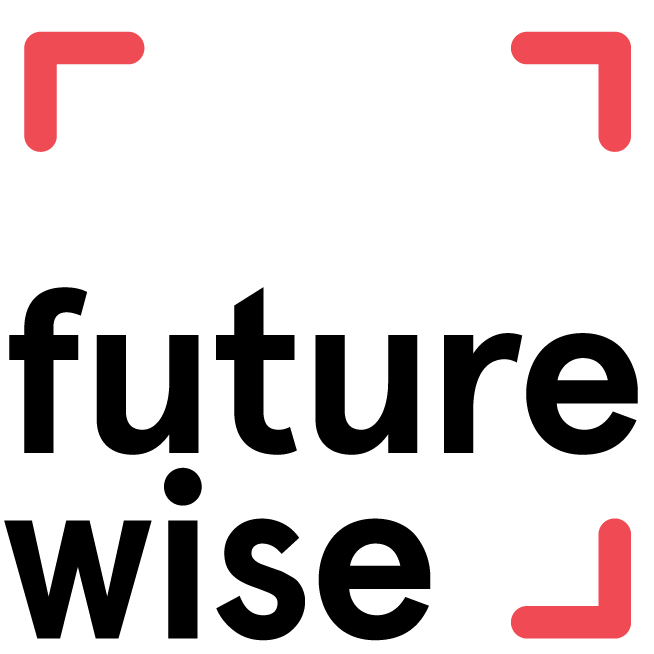](https://futurewise.org/)

Futurewise is a nonprofit organization that works throughout Washington State on the implementation of the Growth Management Act (GMA). We partner with local communities to support land use policies that encourage healthy, equitable and opportunity-rich communities, and that protect our most valuable farmlands, forests and water resources. We have members across the state including the central Puget Sound region. For more information about our organization, visit our website at <https://futurewise.org/>.

## Acknowledgments

The authors received no financial support for the research, authorship, or publication of this article.

Thanks to Yonah Freemark from the Urban Institute for providing zoning district data. Thanks to Lauren Engel, Carol Naito, and Robin Koskey from the Puget Sound Regional Council for sharing the agency’s public transit data and analysis of Washington State House Bill 2160 and Senate Bill 6024. Thanks to Noha Mahgoub from the Office of Governor Jay Inslee for providing feedback and guidance.

## 1 Introduction

<figure>
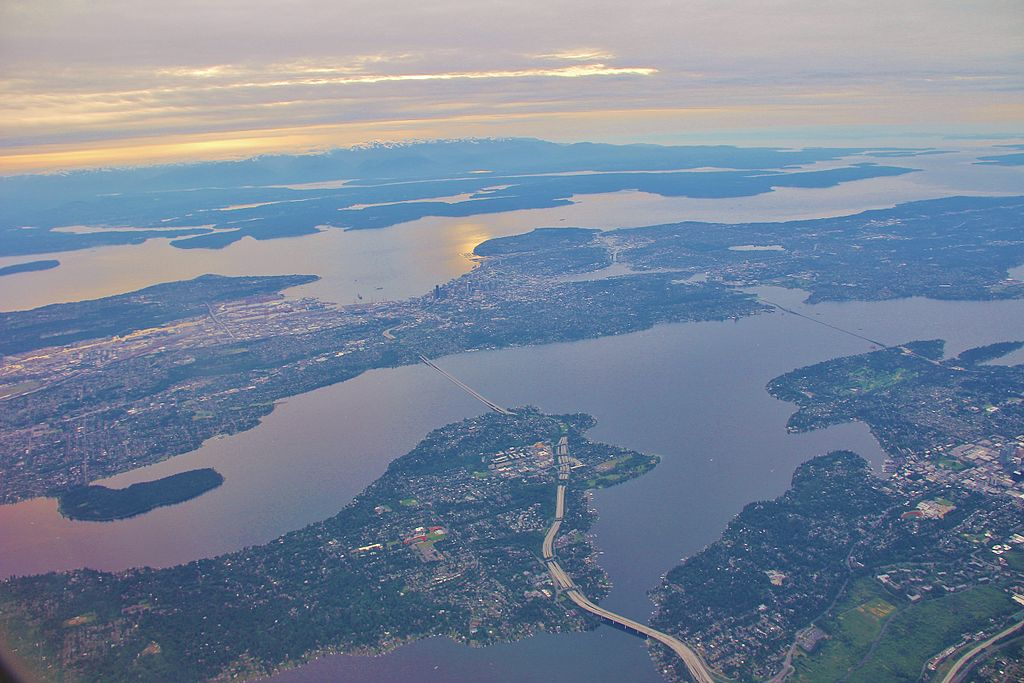
<figcaption aria-hidden="true">Central Puget Sound | Photo courtesy of <a href="#0">Clemens Vasters from Viersen, Germany</a>, <a href="#0">CC BY 2.0</a>, via Wikimedia Commons</figcaption>
</figure>

### 1.1 The Central Puget Sound Region

The Puget Sound metropolitan region is one of North America’s major growth centers for people, jobs, and housing. Between 2010 and 2023, the central Puget Sound’s four-county region (King, Snohomish, Pierce, and Kitsap counties) added more residents and housing units than the rest of Washington state combined.[1] According to forecasts by the Puget Sound Regional Council, the region’s population is expected to grow to 5.8 million people living within 2.8 million households by 2050.([Puget Sound Regional Council 2018](#ref-pugetsoundregionalcouncil2018))

One challenge that the central Puget Sound region faces is high, rising housing costs. The Puget Sound Regional Council’s *Housing Stability Strategy: 2023 Monitoring Report* provides several sobering statistics about the region’s housing costs. According to the report, during the decade between 2010 and 2020, the region added only one housing unit for every three new people that were born or moved there. By 2023, the annual income required to purchase the area’s median priced home was \$160,000.[2] Between July 2015 and July 2023, the median rent cost increased by 50%.([Puget Sound Regional Council 2023b](#ref-pugetsoundregionalcouncil2023))

### 1.2 Transit-Oriented Development

Transit-oriented development (TOD) is a strategy of building homes at or near public transportation stops and stations. In the United States, this strategy has had a complicated record—often leading to increased property values while simultaneously lowering household travel costs and reducing reliance on personal vehicles.([Lund 2006](#ref-lund2006)) TOD often raises concerns about the displacement of low-income residents and small businesses, leading some local and regional governments to include affordability requirements in their TOD programs.([Dawkins and Moeckel 2016](#ref-dawkins2016))

While these concerns are valid, there is not an obvious, superior alternative to TOD. Sharp increases in sprawling, low-density residential and commercial development in Washington during 1980s resulted in many unintended consequences, including ecological disruption, traffic congestion, urban disinvestment, and loss of agricultural lands.([Trohimovich 2002](#ref-trohimovich2002)) This led the Washington State Legislature to adopt the Growth Management Act (GMA), a law requiring cities and counties to plan to accommodate growth within designated areas (urban growth areas or UGAs). Many of the GMA’s planning goals are highly aligned with TOD as a land use strategy—particularly the first four goals of the law.[3]

### 1.3 House Bill 2160

House Bill 2160 (HB 2160) of the 2023-2024 Washington State Legislative Session proposed changes to the GMA intended to promote community and transit-oriented housing development.[4] These changes, which would apply to all cities planning under the GMA, included the following:

-   Prohibiting cities from preventing the siting of multifamily housing on residential land within transit station areas

-   Prohibiting cities from enacting maximum floor area ratio (FAR) regulation under the following thresholds: 3.5 FAR for station areas of light rail, commuter rail, or streetcars; 2.5 FAR for station areas of bus rapid transit

-   Limits the ability of cities to require off-street parking of new residential or mixed-use projects

-   Categorically exempting residential or mixed-use projects within station areas from the State Environmental Policy Act (SEPA)

The bill also proposed several requirements of residential development built within station areas, including making at least 10% of its residential units affordable.[5]

### 1.4 Research Objective & Questions

The purpose of this study is to provide information about the effects of the proposed HB 2160. Specifically, we seek to answer the following questions:

1.  What are the characteristics of the current land uses of the transit station areas as defined in the bill?

2.  Would this bill have an effect on the allowed development capacity of transit station areas?

3.  What is the size of any effect this bill may have?

4.  How are the bill’s effects distributed between the two station area types that it defines?

5.  What patterns are present in the cities that would be significantly impacted by the bill?

## 2 Data & Methods

### 2.1 Research Design

We use a quantitative methodology to attempt to answer our research questions. We then assess House Bill 2160’s impact across the entire study area, the central Puget Sound region, before examining several individual cities as case studies.

We use net development capacity (${NDC}$) to represent the effect of the bill on development capacity at the scale of individual tax parcels. We define ${NDC}$ as follows:

<span id="eq-ndc">$$
NDC_i = FAR_{new,i} - FAR_{old,i}
 \qquad(1)$$</span> where:

-   $FAR_{old,i}$ is parcel $i$’s current maximum development capacity in terms of Floor Area Ratio (FAR).
-   $FAR_{new,i}$ is the maximum development capacity (in FAR) that would apply to parcel $i$ if HB 2160 became law.

To quantify the impact of the proposed bill within a geography larger than an individual parcel, we calculate the area-weighted mean of net development capacity ($AWM_{NDC}$). We define ($AWM_{NDC}$) as follows:

<span id="eq-awm-ndc">$$
AWM_{NDC} = \frac{\sum_{i}(NDC_i \cdot A_i \cdot I_i)}{\sum_{i}(A_i \cdot I_i)}
 \qquad(2)$$</span>

where:

-   $NDC_i = FAR_{new,i} - FAR_{old,i}$ represents the net development capacity for parcel $i$, calculated as the difference between the new Floor Area Ratio (FAR) and the old FAR.
-   $A_i$ denotes the area of parcel $i$.
-   $I_i$ is an indicator function that equals 1 if parcel $i$ satisfies all of the following conditions: it is within a station area, it lies within a zoning district where residential use is permitted, and it is within an urban growth area; otherwise, $I_i$ equals 0.

This formula ensures that the calculation exclusively incorporates parcels meeting the specified criteria, with each parcel’s contribution to the overall mean being proportionally weighted by its area.

Our method offers a metric for evaluating changes in development capacity, reflecting the effects of the proposed bill. It also allows us to summarize the bills effect at different geographic levels, including station area, city, and region. We can then both describe individual geographies (e.g., a specific station area) and compare between geographies (e.g., several cities compared individually to the region).

### 2.2 Data Collection

The study uses several data sets from a variety of different sources. The following table summarize the study’s data:

| Data                                | Description                                                                                                                                 | Citation                                                                      |
|------------------------|------------------------|------------------------|
| Current Parcels (2023)              | A statewide data set of tax parcels                                                                                                         | Washington State Parcels Project ([2023](#ref-washingtonstateparcelsproject)) |
| Transit Stations                    | Transit station locations for light rail, commuter rail, streetcar, and existing bus rapid transit routes in the central Puget Sound Region | Puget Sound Regional Council ([2024](#ref-pugetsoundregionalcouncil2024))     |
| Puget Sound Zoning Districts (2023) | Zoning and land use regulations collected from central Puget Sound local governments’ land use codes and maps                               | Urban Institute ([2023](#ref-urbaninstitute))                                 |
| Urban Growth Areas                  | Urban growth areas for the central Puget Sound region (King, Snohomish, Kitsap, and Pierce counties)                                        | Puget Sound Regional Council ([2023a](#ref-pugetsoundregionalcouncil))        |

### 2.3 Data Analysis

The study uses a combination of a relational database and statistical software to conduct its analysis. The relational database, PostgreSQL with the PostGIS extension, is used to perform spatial filters and spatial joins on the Current Parcel data set. The R programming language is used to perform aggregations and calculate summary statistics on the filtered and augmented parcel dataset. R is also also used to produce summary tables and visualizations.

Data sets containing information relevant to HB 2160 are combined through spatial filtering and spatial joining to produce a data set of all parcels within the station areas. The refined parcel data are augmented with zoning and land use regulation information from the zoning districts. A maximum FAR baseline is estimated for all parcels, then the new maximum FAR that would be introduced by HB 2160 is estimated. For each parcel, the net difference between the current (old) and new FAR is calculated. For parcels where the current zoning allows development greater than the new FAR, the effect of the bill is considered to be zero additional FAR; for parcels where the current zoning is more restrictive that the new FAR, the effect is calculated in terms of additional FAR allowed. The bill’s effect on each parcel is then aggregated by station area, jurisdiction, and region, and summarized using the area-weight mean.[6]

### 2.4 Limitations

Our method is subject to several limitations that are important to consider when interpreting our findings:

1.  **Scope of Parcels**: The study is limited to parcels where residential use is permitted. This exclusion may omit significant areas that could be relevant under different zoning changes or future development scenarios.

2.  **Measurement of Transit Proximity**: Transit walksheds are calculated using Euclidean distance, measuring straight lines to the center of parcels, rather than using network distances that reflect actual walking paths. This method may overestimate or underestimate the true accessibility of parcels to transit services.

3.  **Lot Coverage Assumptions**: In cases where specific regulations on maximum building footprint or FAR are not provided, the study assumes that 100% lot coverage is permissible. This assumption may not align with actual zoning regulations, potentially leading to overestimations of development capacity.

4.  **Omission of Development Regulations**: The estimated FAR metric does not incorporate other development regulations, such as setbacks, which can significantly impact the buildable area on a parcel.

5.  **Homeowner Association (HOA) Restrictions**: The analysis does not consider HOA restrictions that might limit allowed density on parcels, which could reduce the impact of bill in station areas where restrictive HOA’s exist.

6.  **Housing Unit Limits Ignored**: The study does not account for maximum unit limits that can further restrict the number of residences within a given development, possibly leading to inaccurate assessments of potential housing contributions.

7.  **Regulatory Combinations Not Considered**: Interactions between different regulations, such as maximum building height and maximum FAR, are not accounted for. This omission can lead to an oversimplification of the practical limits on parcel development.

8.  **Additional Restrictions on Development**: The analysis does not account for other significant restrictions, including those that prevent development from being sited within critical areas, shoreline environments, or on sites with landmark designations. Such restrictions can materially impact development possibilities but are not reflected in the study.

9.  **Currency of Data**: The study assumes that all data used in the analysis are concurrent and up-to-date. Any discrepancies in data timeliness could affect the accuracy of the results.

Further research, data collection, and methodological refinements could help address these limitations in future analyses.

## 3 Results

[1] The source of these statistics are the author’s analysis of postcensial estimates by the Washington State Office of Financial Management. The central Puget Sound population grew by 414,400 people between 2010 and 2023, while the rest of the state’s population grew by 84,300 people. During the same period, 276,177 housing units were added in the this region, while 179,786 units were created elsewhere in the state.

[2] This estimate includes three of the four central Puget Sound counties: King, Pierce, and Snohomish.

[3] The first four goals of [*RCW 36.70A.020 Planning goals*](https://app.leg.wa.gov/rcw/default.aspx?cite=36.70a.020) are:

> \(1\) Urban growth. Encourage development in urban areas where adequate public facilities and services exist or can be provided in an efficient manner. (2) Reduce sprawl. Reduce the inappropriate conversion of undeveloped land into sprawling, low-density development. (3) Transportation. Encourage efficient multimodal transportation systems that will reduce greenhouse gas emissions and per capita vehicle miles traveled, and are based on regional priorities and coordinated with county and city comprehensive plans. (4) Housing. Plan for and accommodate housing affordable to all economic segments of the population of this state, promote a variety of residential densities and housing types, and encourage preservation of existing housing stock.

[4] This study uses the Second Substitute of House Bill 2160 as the basis for its analysis.

[5] The bill defines “Affordable housing” as:

> \[R\]esidential housing whose monthly costs, including utilities other than telephone, do not exceed 30 percent of the monthly income of a household whose income is: (a) For rental housing, 60 percent of the median household income-adjusted for household size, for the county where the household is located, as reported by the United States department of housing and 5urban development; or (b) For owner-occupied housing, 80 percent of the median household income adjusted for household size, for the county where 8the household is located, as reported by the United States department of housing and urban development. ([Reed 2024](#ref-reed2024))

[6] Parcels that do not allow residential uses are characterized as “not developable” and are not included in the area-weighted mean statistic; however, these parcels are included in the study’s analysis for other purposes such as describing and quantithe characteristics of land within each station area or jurisdiction.

In [ ]:
p <- st_read(here("data_outputs/2024-tod-bill.gpkg"),
             layer = "tod-parcels",
             quiet = TRUE)

p_affected <- p |> 
  st_drop_geometry() |> 
  filter(analysis_type %in% "Developable, Affected")

undev_land_codes <- c(94, 93, 92)

t <- st_read(here("data_outputs/2024-tod-bill.gpkg"),
         layer = "transit-station-areas",
         quiet = TRUE)

zd <- st_read(here("data_outputs/2024-tod-bill.gpkg"),
         layer = "tod-zoning-districts",
         quiet = TRUE)

### 3.1 Central Puget Sound

The study includes approximately 125,000 parcels ($N = 124,941$), all within the four central Puget Sound counties, within an Urban Growth Area, and within HB 2160’s specified distance thresholds of a qualifying transit stop.

We separate the study data into three analysis groups:

1.  **Not Developable**  
    Parcels that do not meet the study’s eligibility criteria. These criteria include allowing residential uses and having a tax assessor-assigned land use that is compatible with development.[1]

2.  **Developable, Not Affected**  
    Parcels that meet the study’s eligibility criteria but have an equal or higher development capacity than the bill would allow and would, therefore, not be affected by the bill.

3.  **Developable, Affected**  
    Parcels that meet the study’s eligibility criteria and have zoning that is more restrictive than the maximum FAR set by the bill and would, therefore, be affected.

[1] For the purposes of this study, tax assessor-assigned land uses that are *not compatible* with development are: ‘Non commercial forest’, ‘Open space land classified under chapter 84.34 RCW’, and ‘Water areas’.

In [ ]:
col_names <- c("Analysis Group", "Parcels (n)", " Land Area (sq. miles)")

p_tbl_summary <- p |> 
  st_drop_geometry() |>
  mutate( analysis_type = factor(analysis_type, 
                                 levels = c("Not Developable", 
                                                   "Developable, Not Affected",
                                                   "Developable, Affected")
                         )
    ) |> 
  group_by(analysis_type) |> 
  summarize(n = n(),
            area_mi2 = sum(parcel_area_mi2))

format_func <- function(x){
  # browser()
  if(!is.numeric(x)){return(x)} 
  
  round(x, digits = 1) |> 
    format(big.mark = ",", decimal.mark = ".")
}

p_tbl_summary |> 
    adorn_totals() |> 
    adorn_percentages(denominator = "col") |> 
    adorn_pct_formatting(digits = 0) |> 
    adorn_ns(format_func = format_func,
             position = "front") |> 
  as_tibble() |> 
  gt(rowname_col = "analysis_type") |> 
  #tab_row_group(label = "Total", rows = 4) |>
  tab_row_group(label = "Analysis Groups", rows = 1:3) |>  
  cols_label(n = "Parcels (n)",
             area_mi2 = html("Land Area (mi<sup>2</sup>)")) |> 
  tab_style(
    style = list(
      cell_text(align = "left", indent = px(20))),
    locations = cells_stub()
  )

Our study focuses on the third analysis group, **Developable, Affected**, which are the majority of the station area parcels by both count (78%) and land area (64%).

Plotting the distribution of area-weighted net development capacity for this group of parcels, we observe two modal “peaks” at +1.5 and +2.5 FAR. The area-weighted mean net development capacity ($AWM_{NDC}$) is +1.79 FAR.

In [ ]:
wt_avg <- weighted.mean(p_affected$zoning_new_max_far_additional,
                        w = p_affected$parcel_area,
                        na.rm = TRUE) |> round(digits = 2)

p_addtl_max <- max(p_affected$zoning_new_max_far_additional, na.rm = TRUE)

n_parcels <- scales::comma(nrow(p_affected))

subtitle <- TeX("Area-weighted mean net development capacity ($AWM_{NDC}$) is 1.79 FAR, n = 97,434 parcels (78%)")

p_affected |> 
  st_drop_geometry() |>  
ggplot() +  
  aes(x = zoning_new_max_far_additional,
      weight = parcel_area_mi2) + 
  geom_histogram(binwidth = 0.25, color = "grey20", fill= "grey80") + 
  # geom_vline(xintercept = wt_avg, color = "tomato",linetype = 2, size =2) +
  scale_y_continuous(labels = scales::label_comma()) + 
  scale_x_continuous( breaks = seq(0, p_addtl_max, by = 0.25)) +
  labs(title = "HB 2160's Effect on Net Development Capacity",
       subtitle = subtitle,
       y = "Land Area (sq. miles)",
       x = "Net Development Capacity (FAR)") 

We also compare $AWM_{NDC}$ across the two station area types, as defined by HB 2160:

In [ ]:
p_station_area <- p_affected |> 
  transmute(parcel_area_mi2,
            zoning_new_max_far_additional,
            analysis_station_area_types)

wt_avg_station_area <- p_station_area |> 
  group_by(analysis_station_area_types) |> 
    summarize(
      n = n(),
      area = sum(parcel_area_mi2, na.rm = TRUE),
      wt_avg = weighted.mean(zoning_new_max_far_additional, 
                             w = parcel_area_mi2,
                             na.rm = TRUE)
    )
  
p_addtl_max <- max(p_station_area$zoning_new_max_far_additional, na.rm = TRUE)

subtitle <- TeX("Large Station Area $AWM_{NDC}$ is 2.15 FAR, Small Station Area $AWM_{NDC}$ is 1.32 FAR")

p_station_area |> 
ggplot() +  
  aes(x = zoning_new_max_far_additional,
      weight = parcel_area_mi2,
      group = analysis_station_area_types) + 
  geom_histogram(binwidth = 0.25, color = "grey20", fill= "grey80") +  
  scale_y_continuous(labels = scales::label_comma()) + 
  scale_x_continuous( breaks = seq(0, p_addtl_max, by = 0.25)) +
  facet_wrap(~ analysis_station_area_types, scales = "fixed", ncol = 1) +
  labs(title = "HB 2160's Effect on Net Development Capacity by Station Area Type",
       subtitle = subtitle,
       y = "Land Area (sq. miles)",
       x = "Net Development Capacity (FAR)") 

Summarizing $AWM_{NDC}$ of **Developable, Affected** parcels by station area reveals the effects of HB 2160 across the central Puget Sound region:

In [ ]:
t_join <- st_join(t,
                  filter(p, analysis_type %in% "Developable, Affected"))

t_map <-  t_join |>
  st_drop_geometry() |>
  group_by(mode, stop_name) |>
  summarize(.groups = "drop",
            parcel_n = n(),
            area_wt_old_far = round(
              weighted.mean(zoning_est_max_far,
                            parcel_area,
                            na.rm = TRUE), 2),
            parea_wt_new_far = round(
              weighted.mean(zoning_new_max_far,
                            parcel_area,
                            na.rm = TRUE), 2),
            area_wt_mean_net_dev_cap = round(
              weighted.mean(zoning_new_max_far_additional,
                                            parcel_area,
                                            na.rm = TRUE), 2)) |>
  ungroup() |>
  left_join(t) |>
  st_sf()

Joining with `by = join_by(mode, stop_name)`

### 3.2 Case Studies

In order to get a sense for how the effects of HB 2160 may differ from place to place, we examine four cities as case studies: Kent, Mercer Island, Redmond, and Shoreline. These cities provide a range different contexts under which we can examine the effects of the proposed bill.

In [ ]:
case_studies <- c("Shoreline",
                  "Redmond",
                  "Mercer Island",
                  "Kent"
                  )

ps_cities <- st_read(
  quiet = TRUE,
  here("data_outputs/2024-tod-bill.gpkg"),
  layer = "ps-cities-pop-hu") |> 
  st_transform(2926) |> 
  mutate(area = st_area(geom),
         area_mi2 = as.numeric(convert_to_mi2(area))
)


st_join(t,ps_cities) |> 
  st_drop_geometry() |> 
  filter(name %in% case_studies) |> 
  group_by(name, mode) |> 
  summarize(.groups = "drop",
            n = n()) |> 
  pivot_wider(names_from = mode,values_from = n,values_fill = 0L) |> 
  mutate(SC = 0L) |> 
  left_join(st_drop_geometry(ps_cities)) |> 
  select(-geoid, -area) |> 
  select(name, population, housing_units, area_mi2, everything()) |> 
  gt(rowname_col = "name") |> 
   tab_spanner(
    label = "Population & Housing",
    columns = c(population, housing_units, area_mi2)
  ) |>
  tab_spanner(
    label = "Transit Station Areas",
    columns = c(LR, CR, SC, BRT)
  ) |> 
  fmt_number( 
    decimals = 0,       
    sep_mark = ","
  ) |> 
  cols_label(population = "Population",
             housing_units = "Housing Units",
             area_mi2 = html("Land Area (mi<sup>2</sup>)")) |> 
   tab_source_note(
    source_note = md("Sources: American Community Survey, 2022 ACS 5-Year Estimates; authors' analysis of transit stop data from [Puget Sound Regional Council 2024](#ref-pugetsoundregionalcouncil2024)")
    )

Joining with `by = join_by(name)`

Grouping the study data by city and analysis group, we find that there is a significant amount of variation between the cities. The vast majority of parcels in Redmond and Mercer Island’s station areas would see their development capacity increased by the bill. However, weighting the station areas by the amount of land affected, we find that the bill’s impact is slightly more modest among the case study cities.

In [ ]:
col_names_city <- c("City",
                    "Analysis Group",
                    "Parcels (n)", 
                    "Land Area (sq. miles)")

p_cities <- p |> 
  st_drop_geometry() |> 
  filter(zoning_juris %in% case_studies)

p_cities_affected <- p_affected |>  
  filter(zoning_juris %in% case_studies)

p_cities |> 
  group_by(zoning_juris, analysis_type) |> 
  summarize(.groups = "drop",
            n = n(),
            area = 
              round(digits = 2,
                    sum(parcel_area_mi2, na.rm = TRUE))
            ) |> 
  group_by(zoning_juris) |> 
  mutate(n_total = sum(n),
         area_total = sum(area)) |> 
  group_by(zoning_juris, analysis_type) |> 
  summarize(
    n = glue("{comma(n)} ({percent(n/n_total)})"),
    area = glue("{area} ({percent(area/area_total)})")
  ) |> 
  ungroup() |>  
  gt(rowname_col = "analysis_type" ,
     groupname_col = "zoning_juris",
     process_md = TRUE) |> 
  cols_label(
    n = "Parcels (n)",
    area = html("Land Area (mi<sup>2</sup>)")
  ) |> 
  tab_style(
    style = list(
      cell_text(indent = px(20))),
    locations = cells_stub()
  )

`summarise()` has grouped output by 'zoning_juris'. You can override using the
`.groups` argument.

In [ ]:
city_awmndc <- p_affected |> 
  st_drop_geometry() |> 
  mutate(analysis_area_weight = parcel_area_mi2 / max(parcel_area_mi2, na.rm = TRUE)) |> 
  group_by(zoning_juris) |> 
  summarize(analysis_awmndc = weighted.mean(na.rm = TRUE,
    zoning_new_max_far_additional,
    w = analysis_area_weight
  ))

case_studies_awmndc <- city_awmndc |> 
  filter(zoning_juris %in% case_studies)

kent_awmndc <- case_studies_awmndc |> 
  filter(zoning_juris %in% "Kent") |> 
  pluck("analysis_awmndc") |> 
  round(digits = 2)

#### 3.2.1 Kent

<figure>
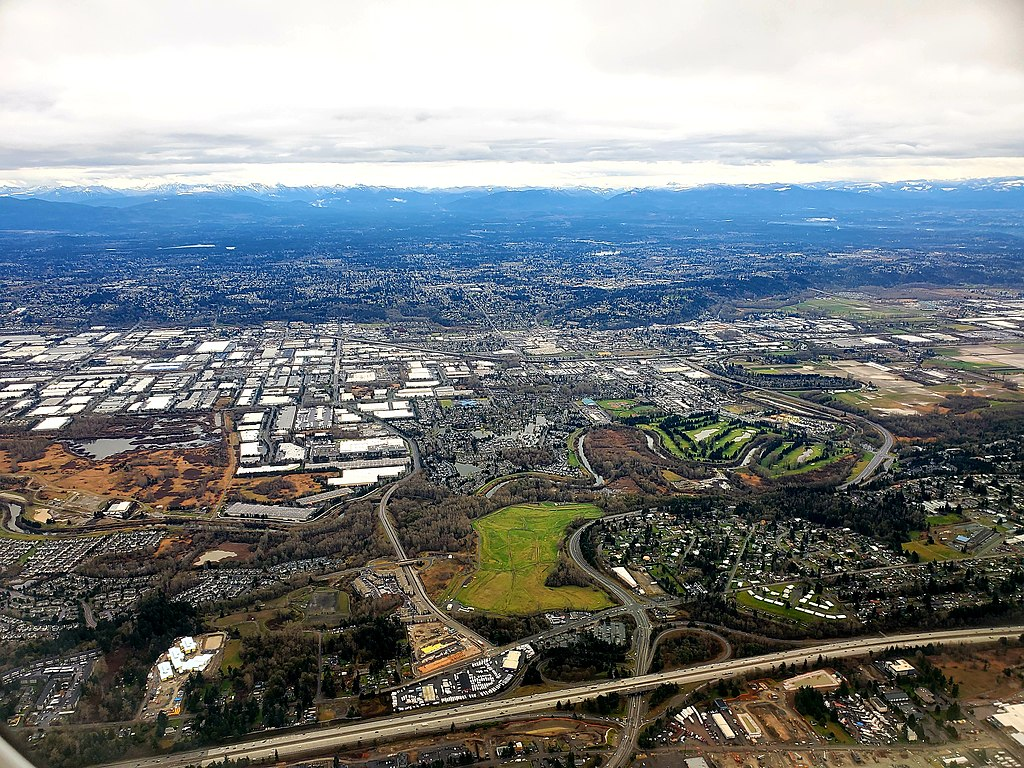
<figcaption aria-hidden="true">Kent, Washington | Photo courtesy of <a href="https://commons.wikimedia.org/wiki/File:Kent_Washington_Above.jpg">Imogen Caroline</a>, <a href="https://creativecommons.org/licenses/by-sa/4.0">CC BY-SA 4.0</a>, via Wikimedia Commons</figcaption>
</figure>

Kent is a city located in King County, Washington. The city has approximate 135,000 residents. Between 2010 and 2020, the city’s population increased by 47.8%.([Puget Sound Regional Council 2021](#ref-pugetsoundregionalcouncil2021))

HB 2160 would affect several station areas within Kent’s city boundary, including two light rail stations, one commuter rail station, and 15 bus rapid transit stations.[1] We find the area-weighted mean net development capacity ($AWM_{NDC}$) for Kent’s station areas to be 2.07 FAR .

[1] See ([**ref?**](#ref-ref))(appendix-case-studies-kent-stations-table) for a complete list of the station areas.

In [ ]:
t_kent <- st_join(t, ps_cities) |>  
  filter(name %in% "Kent") |> 
  transmute(
    mode,
    stop_name = glue("{mode}: {stop_name}")
  )

kent <- ps_cities |> 
  filter(name %in% "Kent")

p_kent <- p |> 
  filter(zoning_juris %in% "Kent") |> 
  select(net_dev_capacity = zoning_new_max_far_additional)

In [ ]:
map_kent <- mapview(kent,
        col.regions = "grey",
        alpha.regions = .10,
        legend = FALSE,
        popup = FALSE,
        highlight = FALSE,
        label = FALSE)

map_kent_stations_baselayer <- mapview(t_kent,
        zcol = "mode",
        col.regions = brewer.pal(3, "Set2"),
        alpha.regions = 0.2,
        color = "gray",
        legend = TRUE,
        popup = FALSE,
        highlight = FALSE,
        label = FALSE,
        layer.name = "Stations") 

map_kent_parcels <- map_kent_stations_baselayer +
  mapview(p_kent,
          zcol = "net_dev_capacity",
          legend = TRUE,
          layer.name = "Net FAR",
          popup = "net_dev_capacity") 

map_kent_parcels

#### 3.2.2 Mercer Island

#### 3.2.3 Redmond

#### 3.2.4 Shoreline

## 4 Discussion

## 5 Conclusion

## Appendices

### 5.1 Case Study Maps

#### 5.1.1 Kent

In [ ]:
t_kent |> 
  st_drop_geometry() |> 
  gt(rowname_col = "mode") |> 
  cols_label(
    stop_name = "Transit Stop/Station") |> 
  tab_style(
    style = list(
      cell_text(align = "left")),
    locations = cells_body()
  )

In [ ]:
t_kent <- st_join(t, ps_cities) |>  
  filter(name %in% "Kent") |> 
  transmute(
    mode,
    stop_name = glue("{mode}: {stop_name}")
  )

kent <- ps_cities |> 
  filter(name %in% "Kent")

map_kent <- mapview(kent,
        col.regions = "grey",
        alpha.regions = .10,
        legend = FALSE,
        popup = FALSE,
        highlight = FALSE,
        label = FALSE)

map_kent_stations_baselayer <- mapview(t_kent,
        zcol = "mode",
        col.regions = brewer.pal(3, "Set2"),
        alpha.regions = 0.2,
        color = "gray",
        legend = TRUE,
        popup = FALSE,
        highlight = FALSE,
        label = FALSE,
        layer.name = "Stations") 

map_kent_stations <- map_kent + 
  mapview(t_kent,
          zcol = "mode",
          col.regions = brewer.pal(3, "Set2"),
          legend = TRUE,
          layer.name = "Station Area Type",
          popup = FALSE,
          label = "stop_name")

map_kent_stations

In [ ]:
zd_kent <- zd |> 
  filter(juris %in% "Kent") |> 
  select(district_name,
         zone,
         allow_residential:min_parking
         )

map_kent_zoning_districts <- map_kent + 
  mapview(zd_kent,
          zcol = "zone",
          col.regions = c(brewer.pal(12, "Set3"),
                          brewer.pal(8, "Set2")),
          popup = TRUE,
          layer.name = "Zoning Districts")

Trimming colors to match number of zcol values.

In [ ]:
p_kent <- p |> 
  filter(zoning_juris %in% "Kent") |> 
  select(net_dev_capacity = zoning_new_max_far_additional)

map_kent_parcels <- map_kent +  
  map_kent_stations_baselayer +
  mapview(p_kent,
          zcol = "net_dev_capacity",
          legend = TRUE,
          layer.name = "Net FAR",
          popup = "net_dev_capacity") 

map_kent_parcels

## References

Dawkins, Casey J., and R. Moeckel. 2016. “Transit-Induced Gentrification: Who Will Stay, and Who Will Go?” *Housing Policy Debate* 26: 801–18. <https://doi.org/10.1080/10511482.2016.1138986>.

Lund, H. 2006. “Reasons for Living in a Transit-Oriented Development, and Associated Transit Use.” *Journal of the American Planning Association* 72: 357–66. <https://doi.org/10.1080/01944360608976757>.

Puget Sound Regional Council. 2018. “Draft 2050 Forecast of People and Jobs.” <https://www.psrc.org/media/1749>.

———. 2021. “Puget Sound Trends, 2010-2020.” <https://www.psrc.org/media/4942>.

———. 2023a. “PSRC Data Portal.”

———. 2023b. “Regional Housing Strategy: 2023 Monitoring Report.” <https://www.psrc.org/sites/default/files/2023-11/reg-housing-strategy-monitoring-rpt-2023.pdf>.

———. 2024. “Community and Transit-Oriented Housing Development Bill 2024: An Interactive Web Map.” <https://arcg.is/0SSvK10>.

Reed, Representative Julia. 2024. “An Act Relating to Promoting Community and Transit-Oriented Housing Development,” February.

Trohimovich, Tim. 2002. “The Growth Management Act (GMA) After More Than 10 Years: Another Look & a Response to Criticisms.” *Growth*. <http://www.futurewise.org/assets/resources/GMA_another_look.pdf>.

Urban Institute. 2023. “Urban Institute Puget Sound Zoning Atlas.”

Washington State Parcels Project. 2023. “Current Parcels (2023).”